In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Step 1: Import the necessary libraries
import numpy as np
import os
from PIL import Image
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import ResNet50


In [14]:
# Step 2: Load the data
train_data = []
train_labels = []
test_data = []
test_labels = []
val_data = []
val_labels = []

# Load data from train folder
for i in range(5):
    folder_name = f"/content/drive/MyDrive/rawdata/Train/Phase{i+1}"
    for filename in os.listdir(folder_name):
        img = Image.open(os.path.join(folder_name, filename))
        img = img.resize((224, 224))
        img_array = np.array(img)
        train_data.append(img_array)
        train_labels.append(i)

# Load data from test folder
for i in range(5):
    folder_name = f"/content/drive/MyDrive/rawdata/Test/Phase{i+1}"
    for filename in os.listdir(folder_name):
        img = Image.open(os.path.join(folder_name, filename))
        img = img.resize((224, 224))
        img_array = np.array(img)
        test_data.append(img_array)
        test_labels.append(i)

# Load data from validation folder
for i in range(5):
    folder_name = f"/content/drive/MyDrive/rawdata/Validation/Phase{i+1}"
    for filename in os.listdir(folder_name):
        img = Image.open(os.path.join(folder_name, filename))
        img = img.resize((224, 224))
        img_array = np.array(img)
        val_data.append(img_array)
        val_labels.append(i)

In [15]:
# Step 3: Preprocess the data
from tensorflow.keras.applications.resnet50 import preprocess_input
train_data = np.array(train_data)
train_labels = np.array(train_labels)
train_data = keras.applications.resnet50.preprocess_input(train_data)

test_data = np.array(test_data)
test_labels = np.array(test_labels)
test_data =  keras.applications.resnet50.preprocess_input(test_data)

val_data = np.array(val_data)
val_labels = np.array(val_labels)
val_data =  keras.applications.resnet50.preprocess_input(val_data)

In [16]:
# Step 4: Load the pre-trained model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


In [17]:
# Step 5: Build the model
model = keras.Sequential(
    [
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation="relu"),
        layers.Dense(5, activation="softmax"),
    ]
)

In [18]:
# Step 6: Compile the model
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)


In [19]:
# Step 7: Train the model
model.fit(train_data, train_labels, epochs=50, batch_size=32, validation_data=(val_data, val_labels))


Epoch 1/50
26/26 [==============================] - 65s 471ms/step - loss: 1.1550 - accuracy: 0.5705 - val_loss: 384.4675 - val_accuracy: 0.3670
Epoch 2/50
26/26 [==============================] - 9s 355ms/step - loss: 0.7070 - accuracy: 0.7154 - val_loss: 200.7777 - val_accuracy: 0.2060
Epoch 3/50
26/26 [==============================] - 10s 373ms/step - loss: 0.5806 - accuracy: 0.7715 - val_loss: 739.1254 - val_accuracy: 0.1086
Epoch 4/50
26/26 [==============================] - 9s 366ms/step - loss: 0.4538 - accuracy: 0.8015 - val_loss: 9.4172 - val_accuracy: 0.5805
Epoch 5/50
26/26 [==============================] - 9s 363ms/step - loss: 0.2679 - accuracy: 0.9014 - val_loss: 4.4621 - val_accuracy: 0.4270
Epoch 6/50
26/26 [==============================] - 9s 344ms/step - loss: 0.4660 - accuracy: 0.8127 - val_loss: 5.9167 - val_accuracy: 0.3109
Epoch 7/50
26/26 [==============================] - 9s 361ms/step - loss: 0.3256 - accuracy: 0.8739 - val_loss: 5.5447 - val_accuracy: 0.434

In [20]:
# Step 8: Evaluate the model
test_loss, test_acc = model.evaluate(test_data, test_labels)
print(f"Test accuracy: {test_acc}")

9/9 [==============================] - 1s 162ms/step - loss: 3.4200 - accuracy: 0.4850
Test accuracy: 0.4849624037742615


In [21]:
# Step 9: Make predictions
predictions = model.predict(test_data)

9/9 [==============================] - 2s 97ms/step


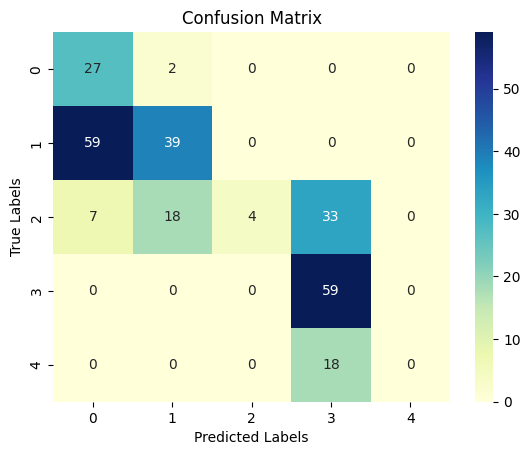

In [24]:
# Step 10: Calculate confusion matrix
# create the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(test_labels, np.argmax(predictions, axis=1))

# plot the heatmap
sns.heatmap(conf_matrix, annot=True, cmap="YlGnBu")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()